In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully
Pandas version: 2.2.2
NumPy version: 1.26.4


In [43]:
# Load dataset
file_path = "../data/hybrid_manufacturing_categorical.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

Dataset loaded successfully!

Shape: 1000 rows × 13 columns

Column names:
  1. Job_ID
  2. Machine_ID
  3. Operation_Type
  4. Material_Used
  5. Processing_Time
  6. Energy_Consumption
  7. Machine_Availability
  8. Scheduled_Start
  9. Scheduled_End
  10. Actual_Start
  11. Actual_End
  12. Job_Status
  13. Optimization_Category


In [44]:
print("First 5 rows:")
print(df.head())

print("\n" + "="*80)
print("Last 5 rows:")
print(df.tail())

print("\n" + "="*80)
print("Random 5 rows:")
print(df.sample(5))

First 5 rows:
  Job_ID Machine_ID Operation_Type  Material_Used  Processing_Time  \
0   J001        M01       Grinding           3.17               76   
1   J002        M01       Grinding           3.35               79   
2   J003        M04       Additive           2.29               56   
3   J004        M04       Grinding           1.76              106   
4   J005        M01          Lathe           1.90               46   

   Energy_Consumption  Machine_Availability      Scheduled_Start  \
0               11.42                    96  2023-03-18 08:00:00   
1                6.61                    84  2023-03-18 08:10:00   
2               11.11                    92  2023-03-18 08:20:00   
3               12.50                    95  2023-03-18 08:30:00   
4                8.13                    88  2023-03-18 08:40:00   

         Scheduled_End         Actual_Start           Actual_End Job_Status  \
0  2023-03-18 09:16:00  2023-03-18 08:05:00  2023-03-18 09:21:00  Completed  

In [46]:
print(" Dataset Overview")
print("=" * 80)

# Display info (no need to wrap inside print)
df.info()

print("\n" + "="*80)
print(" Data Types Summary:")
display(df.dtypes)

print("\n" + "="*80)
print(f" Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n" + "="*80)
print(" Statistical Summary:")
display(df.describe(include='all'))


 Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_ID                 1000 non-null   object 
 1   Machine_ID             1000 non-null   object 
 2   Operation_Type         1000 non-null   object 
 3   Material_Used          1000 non-null   float64
 4   Processing_Time        1000 non-null   int64  
 5   Energy_Consumption     1000 non-null   float64
 6   Machine_Availability   1000 non-null   int64  
 7   Scheduled_Start        1000 non-null   object 
 8   Scheduled_End          1000 non-null   object 
 9   Actual_Start           871 non-null    object 
 10  Actual_End             871 non-null    object 
 11  Job_Status             1000 non-null   object 
 12  Optimization_Category  1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB

 Data Types Summary:


Job_ID                    object
Machine_ID                object
Operation_Type            object
Material_Used            float64
Processing_Time            int64
Energy_Consumption       float64
Machine_Availability       int64
Scheduled_Start           object
Scheduled_End             object
Actual_Start              object
Actual_End                object
Job_Status                object
Optimization_Category     object
dtype: object


 Memory usage: 563.79 KB

 Statistical Summary:


,Job_ID,Machine_ID,Operation_Type,Material_Used,Processing_Time,Energy_Consumption,Machine_Availability,Scheduled_Start,Scheduled_End,Actual_Start,Actual_End,Job_Status,Optimization_Category
count,1000,1000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000,1000,871,871,1000,1000
unique,1000,5,5,NaN,NaN,NaN,NaN,1000,955,851,834,3,4
top,J001,M01,Lathe,NaN,NaN,NaN,NaN,2023-03-18 08:00:00,2023-03-18 09:16:00,2023-03-23 22:05:00,2023-03-21 16:50:00,Completed,Low Efficiency
freq,1,212,212,NaN,NaN,NaN,NaN,1,2,2,3,673,650
mean,NaN,NaN,NaN,3.026480,71.38400,8.521340,89.163000,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.148139,28.48438,3.669941,5.757567,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.010000,20.00000,2.010000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.040000,48.00000,5.397500,84.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.080000,72.00000,8.560000,89.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.042500,96.00000,11.672500,94.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Check missing values column-wise
null_counts = df.isna().sum().sort_values(ascending=False)
null_percent = (df.isna().mean() * 100).round(2)

missing_df = pd.DataFrame({
    "missing_count": null_counts,
    "missing_percent": null_percent
})

missing_df


,missing_count,missing_percent
Actual_End,129,12.9
Actual_Start,129,12.9
Energy_Consumption,0,0.0
Job_ID,0,0.0
Job_Status,0,0.0
Machine_Availability,0,0.0
Machine_ID,0,0.0
Material_Used,0,0.0
Operation_Type,0,0.0
Optimization_Category,0,0.0


In [49]:
# Convert date/time columns from string to datetime
date_cols = ['Scheduled_Start', 'Scheduled_End', 'Actual_Start', 'Actual_End']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[date_cols].head()


,Scheduled_Start,Scheduled_End,Actual_Start,Actual_End
0,2023-03-18 08:00:00,2023-03-18 09:16:00,2023-03-18 08:05:00,2023-03-18 09:21:00
1,2023-03-18 08:10:00,2023-03-18 09:29:00,2023-03-18 08:20:00,2023-03-18 09:39:00
2,2023-03-18 08:20:00,2023-03-18 09:16:00,2023-03-18 08:20:00,2023-03-18 09:16:00
3,2023-03-18 08:30:00,2023-03-18 10:16:00,2023-03-18 08:35:00,2023-03-18 10:21:00
4,2023-03-18 08:40:00,2023-03-18 09:26:00,2023-03-18 08:42:00,2023-03-18 09:28:00


In [50]:
# Fill missing actual times with scheduled times (simple baseline assumption)
df['Actual_Start'] = df['Actual_Start'].fillna(df['Scheduled_Start'])
df['Actual_End'] = df['Actual_End'].fillna(df['Scheduled_End'])

# Double check there are no nulls left in these columns
df[['Actual_Start', 'Actual_End']].isna().sum()


Actual_Start    0
Actual_End      0
dtype: int64

In [51]:
# Delay in minutes: difference between actual and scheduled start
df['Delay_Minutes'] = (df['Actual_Start'] - df['Scheduled_Start']).dt.total_seconds() / 60

# Actual processing time in minutes
df['Actual_Processing_Time'] = (df['Actual_End'] - df['Actual_Start']).dt.total_seconds() / 60

# Sometimes due to data issues delay can be negative -> clip to 0
df['Delay_Minutes'] = df['Delay_Minutes'].apply(lambda x: max(x, 0))

df[['Processing_Time', 'Actual_Processing_Time', 'Delay_Minutes']].head()


,Processing_Time,Actual_Processing_Time,Delay_Minutes
0,76,76.0,5.0
1,79,79.0,10.0
2,56,56.0,0.0
3,106,106.0,5.0
4,46,46.0,2.0


In [52]:
# Choose numeric columns for summary
num_cols = [
    'Processing_Time',
    'Actual_Processing_Time',
    'Delay_Minutes',
    'Energy_Consumption',
    'Machine_Availability',
    'Material_Used'
]

df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Processing_Time,1000.0,71.38400,28.484380,20.00,48.0000,72.00,96.0000,120.00
Actual_Processing_Time,1000.0,71.38400,28.484380,20.00,48.0000,72.00,96.0000,120.00
Delay_Minutes,1000.0,4.84800,8.235941,0.00,0.0000,0.00,5.0000,30.00
Energy_Consumption,1000.0,8.52134,3.669941,2.01,5.3975,8.56,11.6725,14.98
Machine_Availability,1000.0,89.16300,5.757567,80.00,84.0000,89.00,94.0000,99.00
Material_Used,1000.0,3.02648,1.148139,1.01,2.0400,3.08,4.0425,5.00


In [53]:
# Function to quickly see value counts for key categorical columns
cat_cols = ['Machine_ID', 'Operation_Type', 'Job_Status', 'Optimization_Category']

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Machine_ID:
Machine_ID
M01    212
M02    210
M04    199
M05    193
M03    186
Name: count, dtype: int64

Value counts for Operation_Type:
Operation_Type
Lathe       212
Grinding    208
Milling     201
Additive    190
Drilling    189
Name: count, dtype: int64

Value counts for Job_Status:
Job_Status
Completed    673
Delayed      198
Failed       129
Name: count, dtype: int64

Value counts for Optimization_Category:
Optimization_Category
Low Efficiency         650
Moderate Efficiency    183
High Efficiency        161
Optimal Efficiency       6
Name: count, dtype: int64


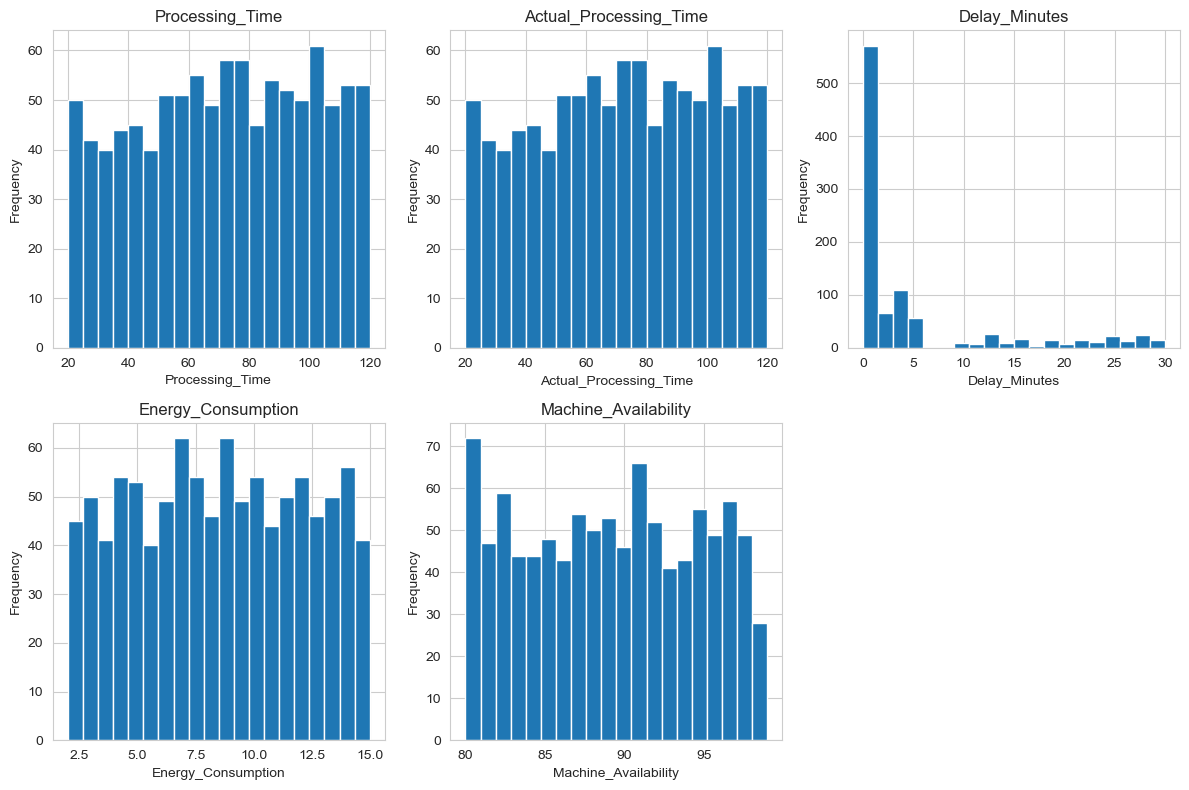

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

numeric_to_plot = ['Processing_Time', 'Actual_Processing_Time', 'Delay_Minutes',
                   'Energy_Consumption', 'Machine_Availability']

for i, col in enumerate(numeric_to_plot, 1):
    plt.subplot(2, 3, i)
    df[col].hist(bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


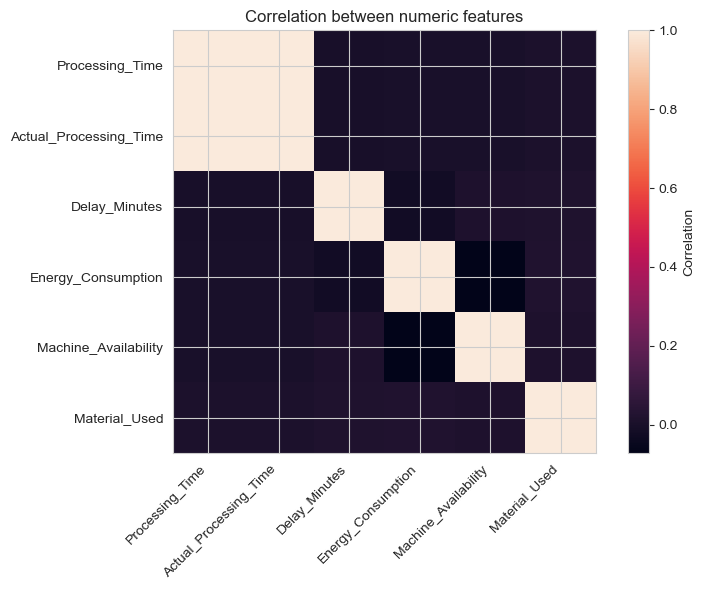

,Processing_Time,Actual_Processing_Time,Delay_Minutes,Energy_Consumption,Machine_Availability,Material_Used
Processing_Time,1.000000,1.000000,-0.004159,0.000371,0.002847,0.010403
Actual_Processing_Time,1.000000,1.000000,-0.004159,0.000371,0.002847,0.010403
Delay_Minutes,-0.004159,-0.004159,1.000000,-0.020626,0.013252,0.016812
Energy_Consumption,0.000371,0.000371,-0.020626,1.000000,-0.072023,0.023735
Machine_Availability,0.002847,0.002847,0.013252,-0.072023,1.000000,0.012664
Material_Used,0.010403,0.010403,0.016812,0.023735,0.012664,1.000000


In [55]:
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar(label='Correlation')
plt.title("Correlation between numeric features")
plt.tight_layout()
plt.show()

corr


In [56]:
# Machine-level summary
machine_summary = df.groupby('Machine_ID').agg({
    'Processing_Time': 'mean',
    'Actual_Processing_Time': 'mean',
    'Delay_Minutes': 'mean',
    'Energy_Consumption': 'mean',
    'Job_ID': 'count'
}).rename(columns={'Job_ID': 'Job_Count'})

machine_summary.sort_values('Delay_Minutes', ascending=False).head()


,Processing_Time,Actual_Processing_Time,Delay_Minutes,Energy_Consumption,Job_Count
Machine_ID,,,,,
M05,70.720207,70.720207,5.761658,8.455855,193
M02,74.023810,74.023810,4.852381,8.423429,210
M04,71.603015,71.603015,4.753769,8.538492,199
M03,69.913978,69.913978,4.537634,8.759892,186
M01,70.457547,70.457547,4.372642,8.452547,212


In [57]:
# Create a flag for delayed jobs (started more than 0 minutes after schedule)
df['Is_Delayed'] = df['Delay_Minutes'] > 0

# Overall delay metrics
overall_delay_stats = {
    "avg_delay_minutes": df['Delay_Minutes'].mean(),
    "median_delay_minutes": df['Delay_Minutes'].median(),
    "max_delay_minutes": df['Delay_Minutes'].max(),
    "percent_jobs_delayed": df['Is_Delayed'].mean() * 100
}

overall_delay_stats


{'avg_delay_minutes': 4.848,
 'median_delay_minutes': 0.0,
 'max_delay_minutes': 30.0,
 'percent_jobs_delayed': 48.5}

In [58]:
# Use actual end date as completion date
df['Actual_End_Date'] = df['Actual_End'].dt.date

# Daily throughput
daily_throughput = (
    df.groupby('Actual_End_Date')['Job_ID']
      .count()
      .reset_index(name='Jobs_Completed')
      .sort_values('Actual_End_Date')
)

# Throughput by machine
machine_throughput = (
    df.groupby('Machine_ID')['Job_ID']
      .count()
      .reset_index(name='Jobs_Completed')
      .sort_values('Jobs_Completed', ascending=False)
)

daily_throughput.head(), machine_throughput.head()


(  Actual_End_Date  Jobs_Completed
 0      2023-03-18              91
 1      2023-03-19             142
 2      2023-03-20             146
 3      2023-03-21             144
 4      2023-03-22             142,
   Machine_ID  Jobs_Completed
 0        M01             212
 1        M02             210
 3        M04             199
 4        M05             193
 2        M03             186)

In [59]:
# Avoid division by zero
df['Energy_per_Minute'] = df.apply(
    lambda row: row['Energy_Consumption'] / row['Actual_Processing_Time']
    if row['Actual_Processing_Time'] > 0 else None,
    axis=1
)

# Average energy efficiency by operation type
energy_by_operation = (
    df.groupby('Operation_Type')['Energy_per_Minute']
      .mean()
      .reset_index()
      .sort_values('Energy_per_Minute')
)

energy_by_operation


,Operation_Type,Energy_per_Minute
2,Grinding,0.143359
4,Milling,0.146151
3,Lathe,0.147231
0,Additive,0.150344
1,Drilling,0.156212


In [60]:
# For each machine, find first scheduled start and last scheduled end
machine_time_window = df.groupby('Machine_ID').agg(
    first_start=('Scheduled_Start', 'min'),
    last_end=('Scheduled_End', 'max'),
    total_processing_minutes=('Actual_Processing_Time', 'sum')
)

# Total calendar time in minutes
machine_time_window['total_time_window_minutes'] = (
    (machine_time_window['last_end'] - machine_time_window['first_start'])
    .dt.total_seconds() / 60
)

# Utilization proxy: processing time / calendar window
machine_time_window['Utilization_Proxy'] = (
    machine_time_window['total_processing_minutes'] /
    machine_time_window['total_time_window_minutes']
)

machine_time_window.sort_values('Utilization_Proxy', ascending=False).head()


,first_start,last_end,total_processing_minutes,total_time_window_minutes,Utilization_Proxy
Machine_ID,,,,,
M02,2023-03-18 08:50:00,2023-03-25 07:35:00,15545.0,10005.0,1.553723
M01,2023-03-18 08:00:00,2023-03-25 06:33:00,14937.0,9993.0,1.494746
M04,2023-03-18 08:20:00,2023-03-25 06:14:00,14249.0,9954.0,1.431485
M05,2023-03-18 09:10:00,2023-03-25 08:21:00,13649.0,10031.0,1.360682
M03,2023-03-18 09:50:00,2023-03-25 07:52:00,13004.0,9962.0,1.305360


In [61]:
optimization_summary = (
    df.groupby('Optimization_Category')
      .agg(
          avg_delay=('Delay_Minutes', 'mean'),
          avg_energy_per_min=('Energy_per_Minute', 'mean'),
          avg_proc_time=('Actual_Processing_Time', 'mean'),
          job_count=('Job_ID', 'count')
      )
      .sort_values('avg_energy_per_min')
)

optimization_summary

,avg_delay,avg_energy_per_min,avg_proc_time,job_count
Optimization_Category,,,,
Optimal Efficiency,0.666667,0.028835,89.333333,6
High Efficiency,2.167702,0.100106,69.347826,161
Low Efficiency,6.136923,0.145754,72.640000,650
Moderate Efficiency,2.765027,0.204741,68.125683,183


In [70]:
df.to_csv("../data/cleaned_manufacturing_data.csv", index=False)




In [71]:
import os
os.getcwd()


'C:\\Users\\kumar\\Smart_Manufacturing_project\\notebooks'

In [72]:
import os

csv_path = os.path.join(os.getcwd(), "..", "data", "cleaned_manufacturing_data.csv")
csv_path = os.path.normpath(csv_path)   # cleans path formatting for Windows
print(csv_path)
print("Exists:", os.path.exists(csv_path))


C:\Users\kumar\Smart_Manufacturing_project\data\cleaned_manufacturing_data.csv
Exists: True
